In [ ]:
import numpy as np
from numba import jit
from scipy import ndimage
from osgeo import gdal
import matplotlib.pyplot as plt

plt.style.use('default')

In [ ]:
@jit(nopython=True)
def np_mean(neighborhood):
    return np.nanmean(neighborhood)

In [ ]:
in_dem = r"..\Data\N46E009.hgt"
dem_ds = gdal.Open(in_dem)
dem_band = dem_ds.GetRasterBand(1)
dem_nodata = dem_band.GetNoDataValue()
dem_array = dem_band.ReadAsArray().astype(float)
dem_array[dem_array == dem_nodata] = np.nan

In [117]:
# Apply a local filter where the resulting value is the mean of the neighborhood 
kernel_size = 7
filtered_dem = ndimage.generic_filter(dem_array, np_mean, size=kernel_size, cval=np.nan)

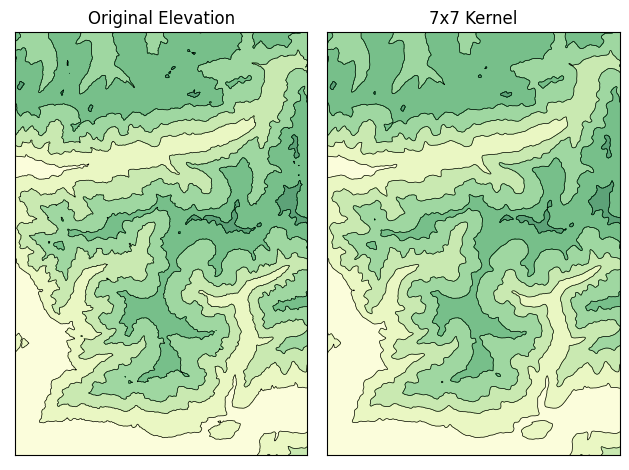

In [141]:
# Show the result of the filter on contours
fig, (ax1, ax2) = plt.subplots(1, 2)
xmin, ymin, xmax, ymax = 1500, 500, 2500, 1500

# Plot the original elevation data
ax1.set_title('Original Elevation')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.contour(dem_array, colors='k', origin='image', levels=6, linewidths=0.5)
ax1.contourf(dem_array, cmap='YlGn', origin='image', levels=6, alpha = 0.7)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

# Plot the filtered data
ax2.set_title(f'{kernel_size}x{kernel_size} Kernel')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.contour(filtered_dem, colors='k', origin='image', levels=6, linewidths=0.5)
ax2.contourf(filtered_dem, cmap='YlGn', origin='image', levels=6, alpha = 0.7)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
plt.tight_layout()
plt.show()